### Logistic Regression

Suppose you are given the scores of two exams for various applicants and the objective is to classify the applicants into two categories based on their scores i.e, into Class-1 if the applicant can be admitted to the university or into Class-0 if the candidate can’t be given admission.

### Outline

* What is Logistic Regression?
* Dataset Visualization
* Hypothesis and Cost Function
* Training the model from scratch
* Model evaluation
* Scikit-learn implementation

### What is Logistic Regression?

If you recall `Linear Regression`, it is used to determine the value of a `continuous dependent variable`. Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only `two` it is called `Logistic Regression`.

In Linear Regression, the output is the weighted sum of inputs. `Logistic Regression` is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a `function` that can map any real value between `0` and `1`.

We can see from the below figure that the output of the linear regression is passed through an activation function that can map any real value between 0 and 1.

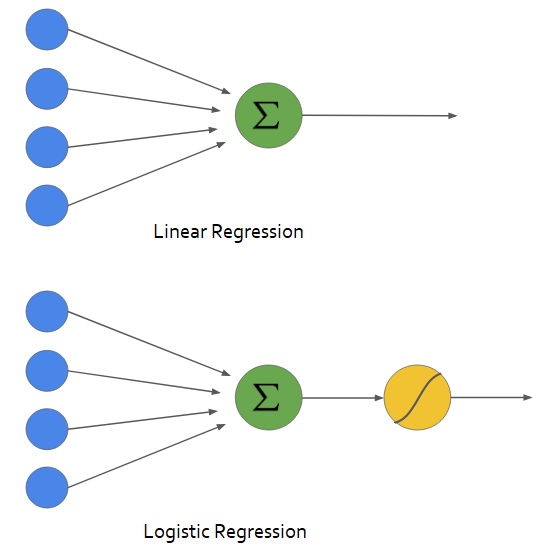

The activation function that is used is known as the `sigmoid function`. The plot of the sigmoid function looks like

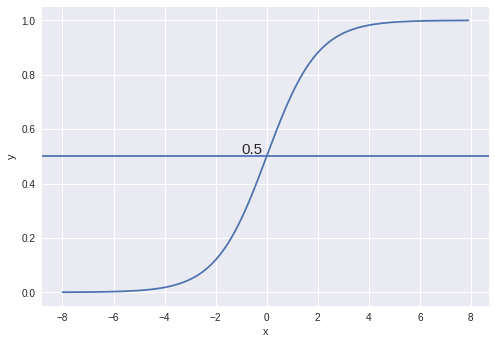

We can see that the value of the sigmoid function always lies between `0` and `1`. The value is exactly `0.5` at`X=0`. We can use `0.5` as the probability `threshold` to determine the classes. If the probability is `greater than 0.5`, we classify it as **Class-1(Y=1)** or else as **Class-0(Y=0)**.

### Dataset

 The data can be downloaded from teams(Scores.txt)

In [39]:
import pandas as pd
colnames=['Exam-1', 'Exam-2', 'Admitted'] 
data = pd.read_csv("./Scores.txt",names=colnames,header=None)

In [40]:
data.shape

(100, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam-1    100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
data.Admitted.value_counts()

1    60
0    40
Name: Admitted, dtype: int64

In [41]:
data.describe()

,Exam-1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Let us Visualize the data

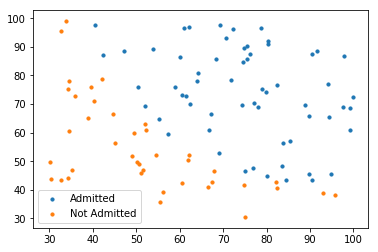

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

### Hypothesis and Cost Function

A Linear Regression model can be represented by the equation.

We then apply the sigmoid function to the output of the linear regression

Where the sigmoid function is represented by

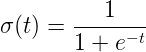

The hypothesis for logistic regression then becomes

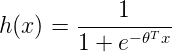

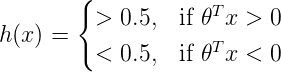

If the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. 

#### Cost Function

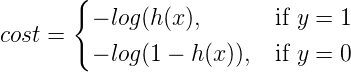

#### Cost function intuition

If the actual class is 1 and the model predicts 0, we should highly penalize it and vice-versa. As you can see from the below picture, for the plot -log(h(x)) as h(x) approaches 1, the cost is 0 and as h(x) nears 0, the cost is infinity(that is we penalize the model heavily). Similarly for the plot -log(1-h(x)) when the actual value is 0 and the model predicts 0, the cost is 0 and the cost becomes infinity as h(x) approaches 1.

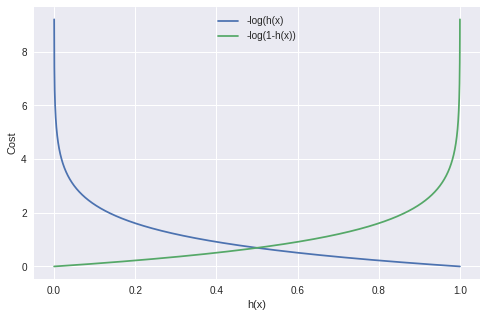

We can combine both of the equations using:

The cost for all the training examples denoted by J(θ) can be computed by taking the average over the cost of all the training samples

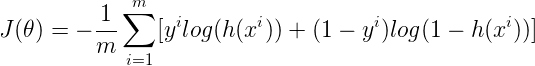

where **m** is the number of training samples.

We will use gradient descent to minimize the cost function. The gradient w.r.t any parameter can be given by

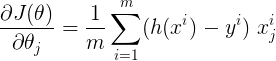

### Training the model

In [16]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [20]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

Next, we define the cost and the gradient function.

In [30]:
def cost_function(self, theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

Let’s also define the `fit` function which will be used to find the model parameters that minimizes the cost function. We have to code the gradient descent approach to compute the model parameters. Here, we will use `fmin_tnc` function from the `scipy` library. It can be used to compute the minimum for any function. It takes arguments as

* func: the function to minimize
* x0: initial values for the parameters that we want to find
* fprime: gradient for the function defined by ‘func’
* args: arguments that needs to be passed to the functions.

In [36]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        """trains the model from the training data

        Uses the fmin_tnc function that is used to find the minimum for any function
        It takes arguments as
            1) func : function to minimize
            2) x0 : initial values for the parameters
            3) fprime: gradient for the function defined by 'func'
            4) args: arguments passed to the function

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        y: array-like, shape = [n_samples, n_target_values]
            Target classes

        theta: initial weights

        Returns
        -------

        self: An instance of self
        """

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """ Predicts the class labels

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        predicted class labels


        """
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """Computes the accuracy of the classifier

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        actual_classes : class labels from the training data set

        probab_threshold: threshold/cutoff to categorize the samples into different classes

        Returns
        -------
        accuracy: accuracy of the model

        """
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

The accuracy of the model is 89.0
The model parameters using Gradient descent


[-25.16131865   0.20623159   0.20147149]


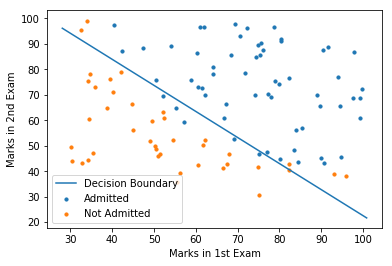

The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[-4.19885865e-08  2.05354461e-01  2.00583554e-01]]


/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from LogisticRegression.Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("./Scores.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Not Admitted')

    # preparing the data for building the model

    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)

    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()

    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X, y)
    parameters = model.coef_
    predicted_classes = model.predict(X)
    accuracy = accuracy_score(y.flatten(),predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    print("The model parameters using scikit learn")
    print(parameters)

### Challange-1

Apply Logistic regression on the [adult]("https://archive.ics.uci.edu/ml/datasets/adult") dataset avialable in UCI reposity

### Challange-2

Apply Logistic regression Titanic disaster datset from Kaggle